In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [110]:
df=pd.read_csv('kidney_disease.csv')

In [111]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
id                400 non-null int64
age               391 non-null float64
bp                388 non-null float64
sg                353 non-null float64
al                354 non-null float64
su                351 non-null float64
rbc               248 non-null object
pc                335 non-null object
pcc               396 non-null object
ba                396 non-null object
bgr               356 non-null float64
bu                381 non-null float64
sc                383 non-null float64
sod               313 non-null float64
pot               312 non-null float64
hemo              348 non-null float64
pcv               330 non-null object
wc                295 non-null object
rc                270 non-null object
htn               398 non-null object
dm                398 non-null object
cad               398 non-null object
appet             399 non-null object
pe         

In [113]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [114]:

df['ane'].nunique()

2

In [115]:
df['rbc'] = (df['rbc'] == 'normal').astype(int)
df['pc'] = (df['pc'] == 'normal').astype(int)
df['pcc'] = (df['pcc'] == 'present').astype(int)
df['ba'] = (df['ba'] == 'present').astype(int)
df['pcc'] = (df['pcc'] == 'present').astype(int)

C:\Users\Abdul Hannan\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [116]:
df['htn'] = (df['htn'] == 'yes').astype(int)
df['dm'] = (df['dm'] == 'yes').astype(int)
df['cad'] = (df['cad'] == 'yes').astype(int)
df['pe'] = (df['pe'] == 'yes').astype(int)
df['ane'] = (df['ane'] == 'yes').astype(int)
df['appet'] = (df['appet'] == 'good').astype(int)
df['classification'] = (df['classification'] == 'ckd').astype(int)

In [117]:
df[['htn','dm', 'cad','rbc',
       'appet', 'pe', 'ane','classification']].head()

,htn,dm,cad,rbc,appet,pe,ane,classification
0,1,1,0,0,1,0,0,1
1,0,0,0,0,1,0,0,1
2,0,1,0,1,0,0,1,1
3,1,0,0,1,0,1,1,1
4,0,0,0,1,1,0,0,1


In [118]:
print(df.isnull().values.any())

True


In [119]:
df.describe()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,sod,pot,hemo,htn,dm,cad,appet,pe,ane,classification
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,400.00000,400.000000,400.0,400.000000,...,313.000000,312.000000,348.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,0.50250,0.647500,0.0,0.055000,...,137.528754,4.627244,12.526437,0.367500,0.335000,0.085000,0.792500,0.190000,0.150000,0.620000
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,0.50062,0.478347,0.0,0.228266,...,10.408752,3.193904,2.912587,0.482728,0.472582,0.279231,0.406024,0.392792,0.357519,0.485994
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,...,4.500000,2.500000,3.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,...,135.000000,3.800000,10.300000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,1.00000,1.000000,0.0,0.000000,...,138.000000,4.400000,12.650000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,1.00000,1.000000,0.0,0.000000,...,142.000000,4.900000,15.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,1.00000,1.000000,0.0,1.000000,...,163.000000,47.000000,17.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [120]:
df = df.drop('id',axis =1)

In [121]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,0,1,0,0,121.0,...,44,7800,5.2,1,1,0,1,0,0,1
1,7.0,50.0,1.020,4.0,0.0,0,1,0,0,NaN,...,38,6000,NaN,0,0,0,1,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31,7500,NaN,0,1,0,0,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,0,0,117.0,...,32,6700,3.9,1,0,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35,7300,4.6,0,0,0,1,0,0,1


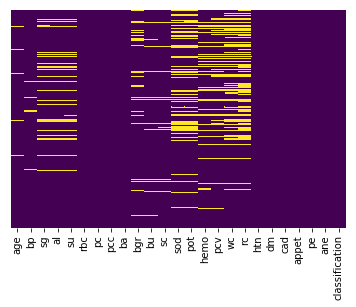

In [122]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [123]:
print(df['age'].isnull().values.any())

True


In [124]:
print(df['age'].isnull().sum())

9


In [125]:
null_indexes_age =df[df['age'].isnull()].index.tolist()
print(null_indexes_age)

[30, 73, 112, 116, 117, 169, 191, 203, 268]


In [126]:
df.age  = df.age.fillna(value = df.age.mean() )

In [127]:
print(df['age'].isnull().values.any())

False


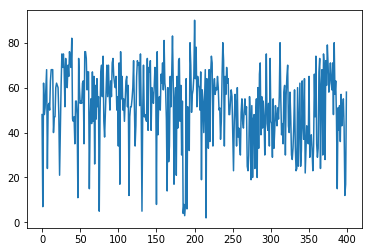

In [128]:
plt.plot(df['age'])

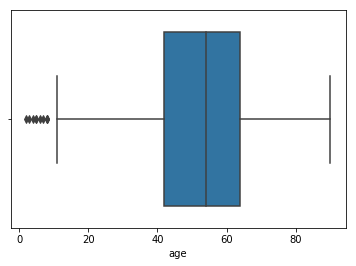

In [129]:
sns.boxplot(df['age'])

In [130]:
Q1 =  df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

In [131]:
outliers_df =df[(df['age'] < Q1-1.5*IQR ) | (df['age'] > Q3+1.5*IQR)]['age']
print(outliers_df)

1      7.0
75     5.0
131    5.0
150    8.0
185    4.0
186    8.0
187    3.0
188    8.0
190    6.0
215    2.0
Name: age, dtype: float64


In [132]:
type(outliers_df)

pandas.core.series.Series

In [133]:
outliers_df.index

Int64Index([1, 75, 131, 150, 185, 186, 187, 188, 190, 215], dtype='int64')

In [134]:
for i in range(len(outliers_df)):
    df['age'][outliers_df.index[i]]  = df.age.median()
print(df['age'][outliers_df.index])

C:\Users\Abdul Hannan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


1      54.0
75     54.0
131    54.0
150    54.0
185    54.0
186    54.0
187    54.0
188    54.0
190    54.0
215    54.0
Name: age, dtype: float64


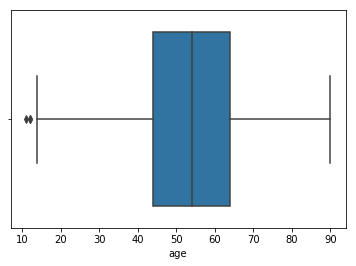

In [135]:
sns.boxplot(df['age'])

In [136]:
from scipy import stats

In [137]:
z = np.abs(stats.zscore(df['age']))
print(z)

[0.30721941 0.08552911 0.60919381 0.30721941 0.11084515 0.47827763
 1.00194233 1.87821351 0.04538706 0.02007102 0.17630324 0.6746519
 1.00194233 1.00194233 1.00194233 0.83088411 0.3726775  0.3726775
 0.47827763 0.60919381 0.54373572 0.47827763 0.30721941 2.07458777
 0.69996794 0.54373572 1.46014895 1.06740042 1.46014895 1.00194233
 0.07920429 1.32923277 0.54373572 0.47827763 1.13285851 0.80556807
 1.52560703 1.26377468 1.06740042 1.91835556 0.43813559 0.50359368
 0.3726775  1.15817455 0.08552911 0.08552911 0.30721941 2.72916865
 1.32923277 0.47827763 0.02007102 0.08552911 0.02007102 0.60919381
 0.6746519  1.15817455 1.52560703 1.52560703 1.32923277 0.41281955
 0.93648425 0.93648425 2.4673363  0.43813559 0.1509872  0.56905176
 0.93648425 0.50359368 0.80556807 1.74729734 0.54373572 0.43813559
 0.74010998 0.07920429 0.21644529 0.08552911 0.30721941 0.93648425
 1.13285851 0.21644529 1.39469086 0.50359368 0.96180029 0.30721941
 0.41281955 1.13285851 0.21644529 1.13285851 0.34736146 0.176303

In [138]:
threshold = 3
print(np.where(z > 3))

(array([], dtype=int64),)


In [152]:
count =0
for i in range(len(df)):
    if df['age'][i]<10:
        count =count+1
        print(df['age'][i])

In [153]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,0,1,0,0,121.0,...,44,7800,5.2,1,1,0,1,0,0,1
1,54.0,50.0,1.020,4.0,0.0,0,1,0,0,NaN,...,38,6000,NaN,0,0,0,1,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31,7500,NaN,0,1,0,0,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,0,0,117.0,...,32,6700,3.9,1,0,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35,7300,4.6,0,0,0,1,0,0,1


In [154]:
print(df['bp'].isnull().values.any())

True


In [156]:
print(df['bp'].isnull().sum())

12


In [158]:
null_indexes_age =df[df['bp'].isnull()].index.tolist()
print(null_indexes_age)

[7, 75, 132, 138, 161, 164, 185, 187, 188, 215, 293, 316]


In [159]:
df.bp  = df.bp.fillna(value = df.bp.mean() )

In [160]:
print(df['bp'].isnull().values.any())

False


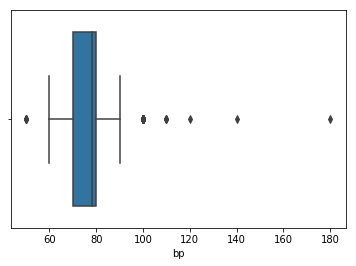

In [161]:
sns.boxplot(df['bp'])

In [162]:
Q1 =  df['bp'].quantile(0.25)
Q3 = df['bp'].quantile(0.75)
IQR = Q3 - Q1

In [163]:
outliers_df_bp =df[(df['bp'] < Q1-1.5*IQR ) | (df['bp'] > Q3+1.5*IQR)]['bp']
print(outliers_df_bp)

1       50.0
8      100.0
18     100.0
24     100.0
33     100.0
42     100.0
51     100.0
59     100.0
73     100.0
87     100.0
88     110.0
90     100.0
93     100.0
98     140.0
99     180.0
107    100.0
124    100.0
131     50.0
133    100.0
134    100.0
146    100.0
175     50.0
186     50.0
192    110.0
196    100.0
198    100.0
210    100.0
211    120.0
217    100.0
226    100.0
229     50.0
233    100.0
234    100.0
238    100.0
245    100.0
246    110.0
Name: bp, dtype: float64


In [164]:
for i in range(len(outliers_df_bp)):
    df['bp'][outliers_df_bp.index[i]]  = df.bp.median()
print(df['bp'][outliers_df_bp.index])

C:\Users\Abdul Hannan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


1      78.234536
8      79.117268
18     78.675902
24     78.455219
33     78.344878
42     78.289707
51     78.262121
59     78.248329
73     78.241432
87     78.237984
88     78.236260
90     78.235398
93     78.234967
98     78.234752
99     78.234644
107    78.234590
124    78.234563
131    78.234550
133    78.234556
134    78.234553
146    78.234551
175    78.234550
186    78.234551
192    78.234551
196    78.234551
198    78.234551
210    78.234551
211    78.234551
217    78.234551
226    78.234551
229    78.234551
233    78.234551
234    78.234551
238    78.234551
245    78.234551
246    78.234551
Name: bp, dtype: float64


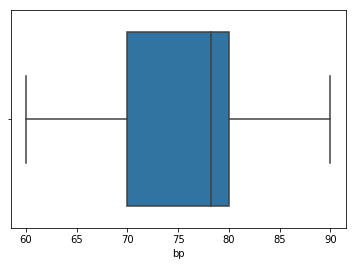

In [165]:
sns.boxplot(df['bp'])

In [166]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.000000,1.020,1.0,0.0,0,1,0,0,121.0,...,44,7800,5.2,1,1,0,1,0,0,1
1,54.0,78.234536,1.020,4.0,0.0,0,1,0,0,NaN,...,38,6000,NaN,0,0,0,1,0,0,1
2,62.0,80.000000,1.010,2.0,3.0,1,1,0,0,423.0,...,31,7500,NaN,0,1,0,0,0,1,1
3,48.0,70.000000,1.005,4.0,0.0,1,0,0,0,117.0,...,32,6700,3.9,1,0,0,0,1,1,1
4,51.0,80.000000,1.010,2.0,0.0,1,1,0,0,106.0,...,35,7300,4.6,0,0,0,1,0,0,1


In [167]:
print(df['sg'].isnull().values.any())
print(df['sg'].isnull().sum())
null_indexes_sg =df[df['sg'].isnull()].index.tolist()
print(null_indexes_sg)
df.sg  = df.sg.fillna(value = df.sg.mean() )
print(df['sg'].isnull().values.any())


True
47
[13, 17, 21, 28, 30, 37, 50, 57, 59, 78, 81, 82, 86, 98, 99, 104, 106, 109, 121, 122, 125, 132, 142, 148, 151, 160, 162, 166, 174, 188, 197, 201, 202, 203, 205, 208, 222, 228, 231, 236, 238, 245, 268, 280, 295, 322, 346]
False


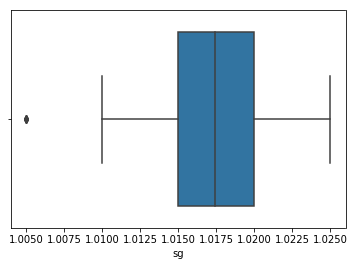

In [168]:
sns.boxplot(df['sg'])

In [170]:
Q1 =  df['sg'].quantile(0.25)
Q3 = df['sg'].quantile(0.75)
IQR = Q3 - Q1
outliers_df_sg =df[(df['sg'] < Q1-1.5*IQR ) | (df['sg'] > Q3+1.5*IQR)]['sg']
print(outliers_df_sg)

3      1.005
29     1.005
48     1.005
55     1.005
76     1.005
87     1.005
154    1.005
Name: sg, dtype: float64


In [171]:
for i in range(len(outliers_df_sg)):
    df['sg'][outliers_df_sg.index[i]]  = df.sg.median()
print(df['sg'][outliers_df_sg.index])

C:\Users\Abdul Hannan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


3      1.017408
29     1.017408
48     1.017408
55     1.017408
76     1.017408
87     1.017408
154    1.017408
Name: sg, dtype: float64


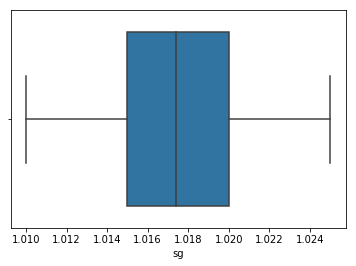

In [172]:
sns.boxplot(df['sg'])

In [175]:
df.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,sod,pot,hemo,htn,dm,cad,appet,pe,ane,classification
count,400.000000,400.000000,400.000000,354.000000,351.000000,400.00000,400.000000,400.0,400.000000,356.000000,...,313.000000,312.000000,348.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,52.693376,74.714595,1.017625,1.016949,0.450142,0.50250,0.647500,0.0,0.055000,148.036517,...,137.528754,4.627244,12.526437,0.367500,0.335000,0.085000,0.792500,0.190000,0.150000,0.620000
std,15.296083,9.228703,0.005107,1.352679,1.099191,0.50062,0.478347,0.0,0.228266,79.281714,...,10.408752,3.193904,2.912587,0.482728,0.472582,0.279231,0.406024,0.392792,0.357519,0.485994
min,11.000000,60.000000,1.010000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,22.000000,...,4.500000,2.500000,3.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,70.000000,1.015000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,99.000000,...,135.000000,3.800000,10.300000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,54.000000,78.234551,1.017408,0.000000,0.000000,1.00000,1.000000,0.0,0.000000,121.000000,...,138.000000,4.400000,12.650000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,64.000000,80.000000,1.020000,2.000000,0.000000,1.00000,1.000000,0.0,0.000000,163.000000,...,142.000000,4.900000,15.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,90.000000,90.000000,1.025000,5.000000,5.000000,1.00000,1.000000,0.0,1.000000,490.000000,...,163.000000,47.000000,17.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [176]:
print(df['al'].isnull().values.any())
print(df['al'].isnull().sum())
null_indexes_al =df[df['al'].isnull()].index.tolist()
print(null_indexes_al)
df.al  = df.al.fillna(value = df.al.mean() )
print(df['al'].isnull().values.any())


True
46
[13, 17, 21, 30, 37, 50, 57, 59, 78, 81, 82, 86, 98, 104, 106, 109, 122, 125, 132, 134, 136, 142, 148, 151, 160, 162, 166, 174, 188, 197, 201, 202, 203, 205, 208, 222, 228, 231, 236, 238, 245, 268, 280, 295, 322, 346]
False


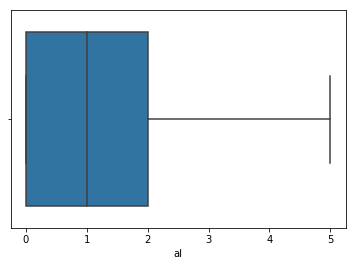

In [177]:
sns.boxplot(df['al'])

In [178]:
Q1 =  df['al'].quantile(0.25)
Q3 = df['al'].quantile(0.75)
IQR = Q3 - Q1
outliers_df_al =df[(df['al'] < Q1-1.5*IQR ) | (df['al'] > Q3+1.5*IQR)]['al']
print(outliers_df_al)

Series([], Name: al, dtype: float64)


In [179]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.000000,1.020000,1.0,0.0,0,1,0,0,121.0,...,44,7800,5.2,1,1,0,1,0,0,1
1,54.0,78.234536,1.020000,4.0,0.0,0,1,0,0,NaN,...,38,6000,NaN,0,0,0,1,0,0,1
2,62.0,80.000000,1.010000,2.0,3.0,1,1,0,0,423.0,...,31,7500,NaN,0,1,0,0,0,1,1
3,48.0,70.000000,1.017408,4.0,0.0,1,0,0,0,117.0,...,32,6700,3.9,1,0,0,0,1,1,1
4,51.0,80.000000,1.010000,2.0,0.0,1,1,0,0,106.0,...,35,7300,4.6,0,0,0,1,0,0,1


In [180]:
print(df['su'].isnull().values.any())
print(df['su'].isnull().sum())
null_indexes_su =df[df['su'].isnull()].index.tolist()
print(null_indexes_su)
df.su  = df.su.fillna(value = df.su.mean() )
print(df['su'].isnull().values.any())


True
49
[13, 17, 21, 30, 37, 50, 57, 59, 78, 81, 82, 85, 86, 98, 104, 106, 109, 121, 122, 125, 132, 134, 136, 142, 148, 151, 160, 162, 166, 174, 188, 194, 197, 201, 202, 203, 205, 208, 222, 228, 231, 236, 238, 245, 268, 280, 295, 322, 346]
False


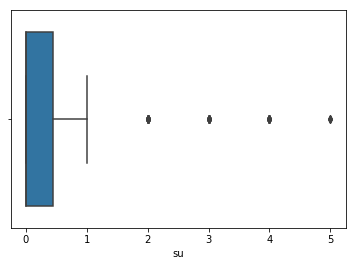

In [181]:
sns.boxplot(df['su'])

In [182]:
Q1 =  df['su'].quantile(0.25)
Q3 = df['su'].quantile(0.75)
IQR = Q3 - Q1
outliers_df_su =df[(df['su'] < Q1-1.5*IQR ) | (df['su'] > Q3+1.5*IQR)]['su']
print(outliers_df_su)

2      3.0
7      4.0
10     4.0
14     2.0
18     3.0
27     4.0
28     3.0
39     2.0
53     5.0
54     2.0
56     4.0
61     3.0
69     4.0
70     4.0
72     3.0
90     2.0
93     2.0
99     4.0
107    4.0
111    3.0
113    2.0
120    3.0
123    3.0
128    3.0
135    2.0
140    4.0
143    4.0
146    3.0
154    3.0
158    2.0
165    2.0
168    4.0
169    2.0
170    5.0
172    2.0
180    4.0
184    2.0
198    2.0
204    2.0
210    2.0
212    4.0
223    3.0
225    5.0
226    2.0
237    2.0
242    3.0
244    2.0
248    3.0
Name: su, dtype: float64


In [183]:
for i in range(len(outliers_df_su)):
    df['su'][outliers_df_su.index[i]]  = df.su.median()
print(df['su'][outliers_df_su.index])

C:\Users\Abdul Hannan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


2      0.0
7      0.0
10     0.0
14     0.0
18     0.0
27     0.0
28     0.0
39     0.0
53     0.0
54     0.0
56     0.0
61     0.0
69     0.0
70     0.0
72     0.0
90     0.0
93     0.0
99     0.0
107    0.0
111    0.0
113    0.0
120    0.0
123    0.0
128    0.0
135    0.0
140    0.0
143    0.0
146    0.0
154    0.0
158    0.0
165    0.0
168    0.0
169    0.0
170    0.0
172    0.0
180    0.0
184    0.0
198    0.0
204    0.0
210    0.0
212    0.0
223    0.0
225    0.0
226    0.0
237    0.0
242    0.0
244    0.0
248    0.0
Name: su, dtype: float64


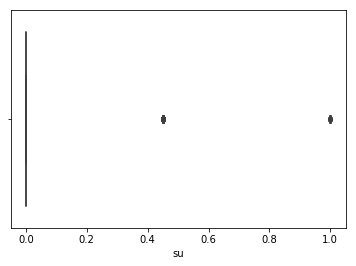

In [184]:
sns.boxplot(df['su'])

In [185]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.000000,1.020000,1.0,0.0,0,1,0,0,121.0,...,44,7800,5.2,1,1,0,1,0,0,1
1,54.0,78.234536,1.020000,4.0,0.0,0,1,0,0,NaN,...,38,6000,NaN,0,0,0,1,0,0,1
2,62.0,80.000000,1.010000,2.0,0.0,1,1,0,0,423.0,...,31,7500,NaN,0,1,0,0,0,1,1
3,48.0,70.000000,1.017408,4.0,0.0,1,0,0,0,117.0,...,32,6700,3.9,1,0,0,0,1,1,1
4,51.0,80.000000,1.010000,2.0,0.0,1,1,0,0,106.0,...,35,7300,4.6,0,0,0,1,0,0,1


In [186]:
print(df['rbc'].isnull().values.any())

False


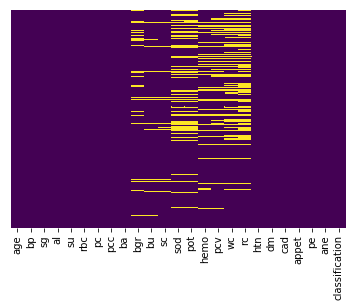

In [187]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')